### To determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

In [173]:
#Importing all the necessarylibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [210]:
#Loading the dataset
df_train=pd.read_csv("train_agriculture.csv")
df_train["source"]="train"
df_test=pd.read_excel("test_agriculture.xlsx")
df_test["source"]="test"
df=df_train
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1,train
2,F00000004,257,1,0,1,0,0.0,0,2,1,train
3,F00000005,257,1,1,1,0,0.0,0,2,1,train
4,F00000006,342,1,0,1,0,0.0,0,2,1,train


In [175]:
for i in df.columns:
    a=df[i].unique()
    len(a)
    print(i,len(a))
    if len(a)<5:
        print(a)

ID 88858
Estimated_Insects_Count 71
Crop_Type 2
[1 0]
Soil_Type 2
[0 1]
Pesticide_Use_Category 3
[1 3 2]
Number_Doses_Week 20
Number_Weeks_Used 65
Number_Weeks_Quit 51
Season 3
[1 2 3]
Crop_Damage 3
[0 1 2]
source 1
['train']


In [176]:
df.nunique()

ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
source                         1
dtype: int64

In [177]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'source'],
      dtype='object')

In [178]:
df.shape

(88858, 11)

In [179]:
#Check for Null Values
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
source                        0
dtype: int64

Observation:
    
    1. Number_Weeks_Used has 9000  missing data.

In [180]:
#Replacing missing values with mode of the data .
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace=True)

In [181]:
# Again Checking for Null Values
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
source                     0
dtype: int64

Observation:
    
    Clearly ,there are no null values present in the dataset.

In [182]:
#df_test.shape

In [183]:
#Checking Datatypes 
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
source                      object
dtype: object

Observation:

    1.ID column is in object datatype.
    
    2.Rest all columns are in int64 datatype except Number_Weeks_Used column.

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        88858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
 10  source                   88858 non-null  object 
dtypes: float64(1), int64(8), object(2)
memory usage: 7.5+ MB


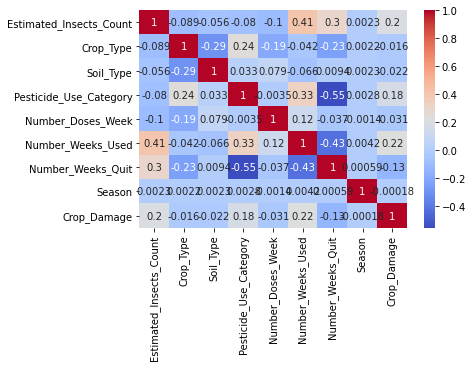

In [185]:
#Checking Correlation using heatmap
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Observation:

    1.Estimated_Insects_count,Pesticide_use_category and Number_weeks_used are positively correlated with Crop damage.
    
    2.Number_weeks_used  is positively correlated with Estimated_Insects_count and Pesticide_use_category. 
    
    3.Number_weeks_Quit is highly negatively correlated with Pesticide_use_category and Number_weeks_used.

## Univariate Analysis

<Figure size 864x360 with 0 Axes>

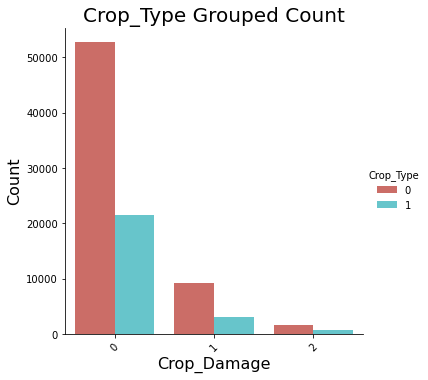

In [186]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Damage', data=df, palette="hls",kind='count',hue='Crop_Type')
plt.xlabel("Crop_Damage", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Crop_Type Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Observations:
    
    1. Crop damage due to pesticides are less in comparison to damage due to other causes.
    2. Crop type 0 has higher chance of survival compared to crop type 1.

Text(0.5, 1.0, 'Crop Damage vs Pesticide Use Category ')

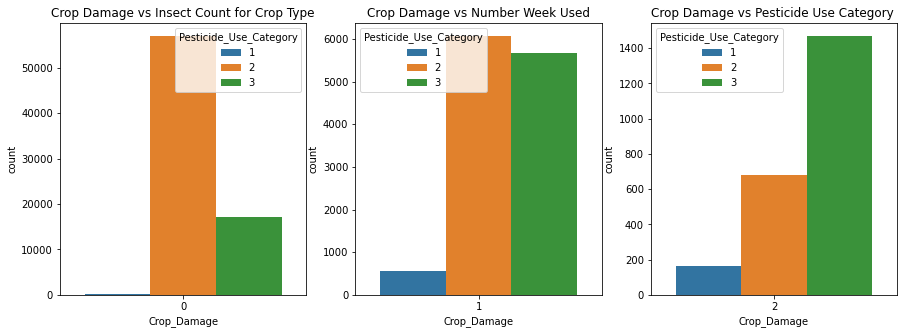

In [187]:
fig, [ax1,ax2,ax3] = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==0],ax=ax1)
ax1.set_title("Crop Damage vs Insect Count for Crop Type")
ax2=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==1],ax=ax2)
ax2.set_title("Crop Damage vs Number Week Used")
ax3=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==2],ax=ax3)
ax3.set_title("Crop Damage vs Pesticide Use Category ")


##### Observations: 
1. Type 2 pesticide is much safer to use as compared to Type 3 pesticide. 
2. Type 3 pesticide shows most pesticide related damage to crops. 

<Figure size 864x360 with 0 Axes>

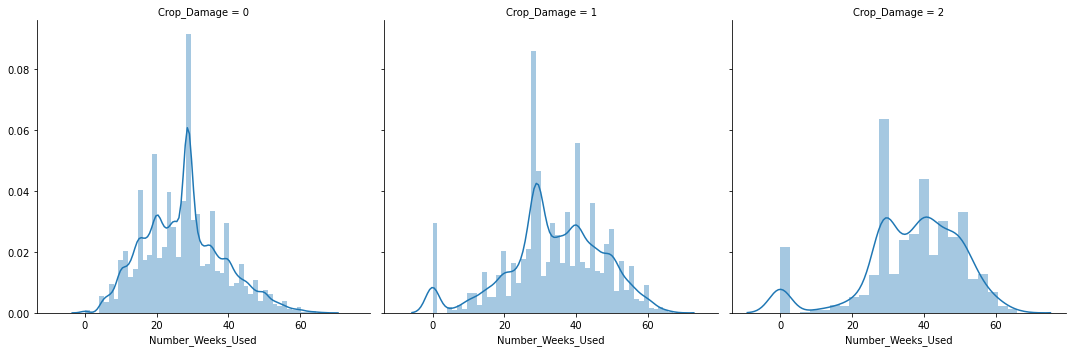

In [188]:
plt.figure(figsize=(12,5))
g= sns.FacetGrid(df, col='Crop_Damage',size=5)
g = g.map(sns.distplot, "Number_Weeks_Used")
plt.show()

##### Observations: 
1. From Graph 1 we can conclude that till 20-25 weeks damage due to pesticide is negligible. 
2. From Graph 3 we can see that after 20 weeks damage due to use of pesticide increrases significantly. 

## Bivariate Analysis

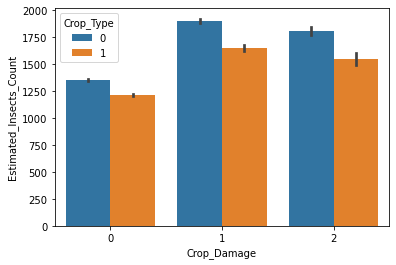

In [189]:
sns.barplot(x="Crop_Damage" ,y="Estimated_Insects_Count",hue="Crop_Type",data=df)

##### Observations: 
1. Clearly observed that Most insect attacks are done on crop type 0.

<Figure size 864x360 with 0 Axes>

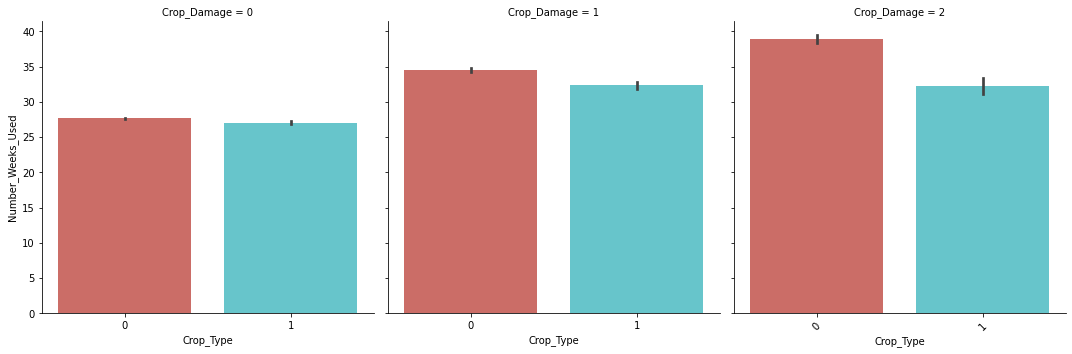

In [190]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Type',y='Number_Weeks_Used', data=df, palette="hls",kind='bar',col='Crop_Damage')
plt.xticks(rotation=45)
plt.show()

##### Observations:
1. Crop Type 0 is more vulnerable to pesticide related and other damages as compared to Type1
2. Avg. duration of pesticide related damage is lower for Crop type 1. 

### Outliers Analysis

In [191]:
#Lets use the describe function 
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,11.747567,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.623970,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


##### Observations:
    
    1.Clearly some outliers are present in Insect_Count ,doses_week and number_weeks_quit columns.
    

In [192]:
#Dropping ID and Source column from the data for outlier analysis
df.drop(columns=["ID","source"],axis=1,inplace=True)
df.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

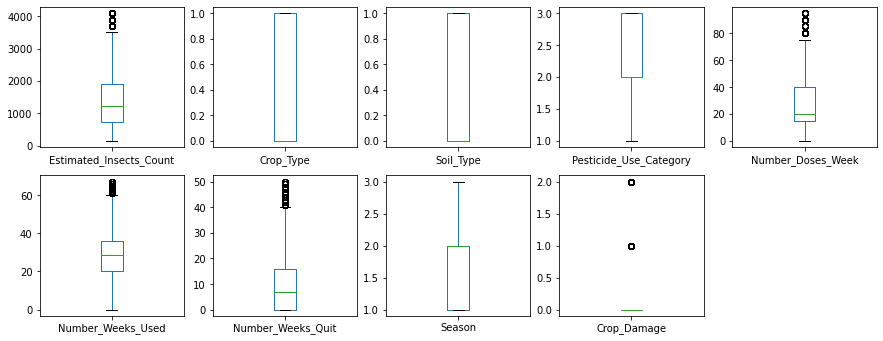

In [193]:
#Now we will check for outliers using boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

In [194]:
#now finding the mean value of each column and replacing with outlier value
df.loc[df['Number_Weeks_Used']>55,'Number_Weeks_Used'] = np.mean(df["Number_Weeks_Used"])
df.loc[df['Estimated_Insects_Count']>3500,'Estimated_Insects_Count'] = np.mean(df["Estimated_Insects_Count"])
df.loc[df['Number_Weeks_Quit']>40,'Number_Weeks_Quit'] = np.mean(df["Number_Weeks_Quit"])
df.loc[df['Number_Doses_Week']>80,'Number_Doses_Week'] = np.mean(df["Number_Doses_Week"])
    

Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

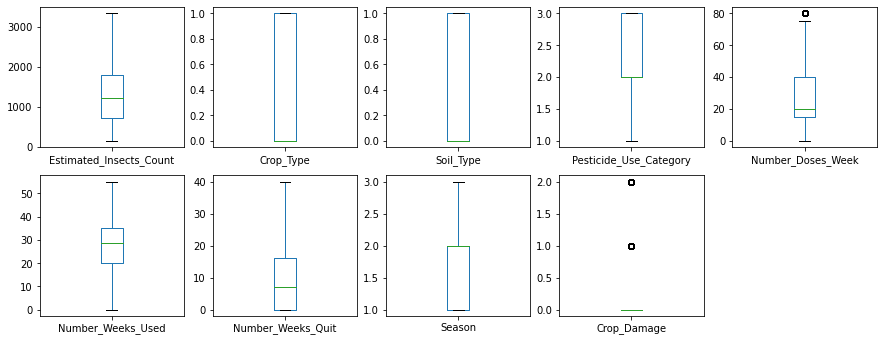

In [195]:
#Now we will check for outliers using boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

#we can see that outliers have been removed in Total Volume , Large, Small and Total bags

##### Observations:
    1.we can see that outliers have been removed in Insect_Count, Number_Doses_Weeks,Number_Weeks_Quit
    

## Skew Analysis

In [196]:
df.skew()

Estimated_Insects_Count    0.647325
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.911044
Number_Weeks_Used          0.117167
Number_Weeks_Quit          0.831183
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE1CA1F6D0>,
      dtype=object)

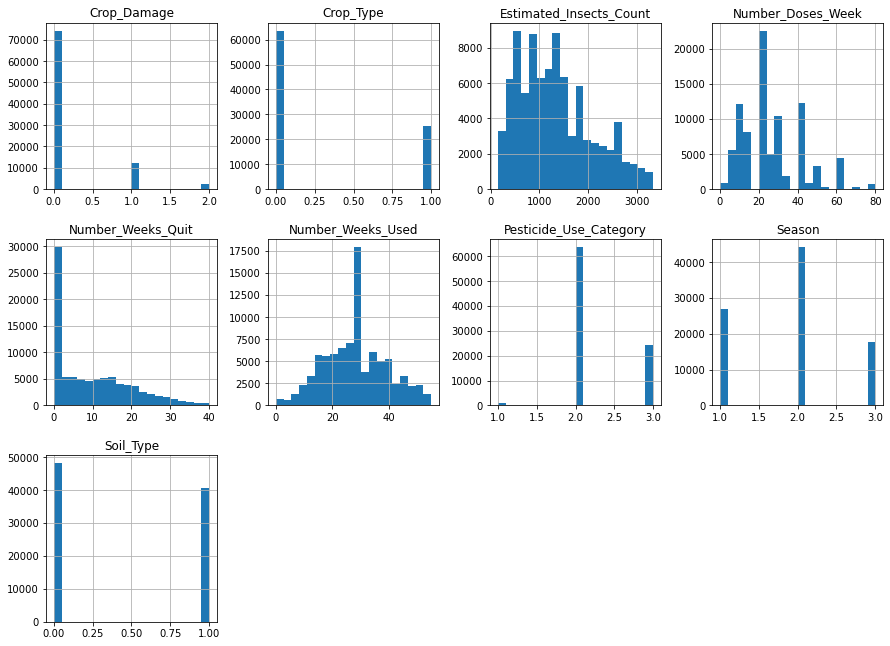

In [197]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)
    

##### Observations:
    
    1. We can see that all the data is normally distributed. 
    

## Classifier Modelling

In [198]:
#Importing libraries
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [199]:
# Dropping region and Day from x for classifcation dataset
#Assigning the value of x for testing and training
df_xc=df.drop(columns=['Crop_Damage'])
yc=df[["Crop_Damage"]]

In [200]:
#Bring every column to common scale by using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xc = sc.fit_transform(df_xc)
df_xc=pd.DataFrame(xc,columns=df_xc.columns)

In [201]:
#defining a function to find accuracy score, crossvalidation score for the given dataset
def max_acc_score(names,model_c,df_xc,yc):
    accuracy_scr_max = 0
    for r_state in range(42,100):
        train_xc,test_xc,train_yc,test_yc = train_test_split(df_xc,yc,random_state = r_state,test_size = 0.33,stratify = yc)
        model_c.fit(train_xc,train_yc)
        accuracy_scr = accuracy_score(test_yc,model_c.predict(test_xc))
        if accuracy_scr> accuracy_scr_max:
            accuracy_scr_max=accuracy_scr
            final_state = r_state
            final_model = model_c
            mean_acc = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").mean()
            std_dev = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").std()
            cross_val = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy")
    print('\033[1m',"Results for model : ",names,'\n','\033[0m'
          "max accuracy score is" , accuracy_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val) 
    print("*"*100)

In [202]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 
accuracy_scr_max = []
accuracy=[]
std_dev=[]
mean_acc=[]
cross_val=[]
models=[]
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Gaussian NB',GaussianNB()))


for names,model_c in models:
    max_acc_score(names,model_c,df_xc,yc)
   

 Results for model :  Random Forest 
 max accuracy score is 0.827308689128359 
 Mean accuracy score is :  0.8227283851917901 
 Std deviation score is :  0.0017259364106887492 
 Cross validation scores are :   [0.82568085 0.82286743 0.82191087 0.82161949 0.82297001]
****************************************************************************************************
 Results for model :  KNN 
 max accuracy score is 0.8304119492565817 
 Mean accuracy score is :  0.8270498878034861 
 Std deviation score is :  0.0017037082599439077 
 Cross validation scores are :   [0.82939455 0.82787531 0.82494936 0.82780935 0.82522087]
****************************************************************************************************
 Results for model :  Decision Tree Classifier 
 max accuracy score is 0.7536488882826354 
 Mean accuracy score is :  0.7475973026583367 
 Std deviation score is :  0.0026009823178113167 
 Cross validation scores are :   [0.75326356 0.74611749 0.74651137 0.7461032  0.7485228

##### Observations: 
a. From initial model accuracy values we see that KNN are performing better than others.  
b. It has maximum accuracy score and minimum standard deviations.   
c. DTC is the worst performer with 74% accuracy.

In [203]:
# Estimating best n_neighbors using grid search CV for KNeighborsClassifier

kNN=KNeighborsClassifier()
parameters={"n_neighbors":range(2,30)}
clf = GridSearchCV(kNN, parameters, cv=5,scoring="accuracy")
clf.fit(df_xc,yc)
clf.best_params_

{'n_neighbors': 22}

In [204]:
#Again running KNeighborsClassifier with n_neighbor = 22
kNN=KNeighborsClassifier(n_neighbors=22)
max_acc_score("KNeighbors Classifier",kNN,df_xc,yc)

 Results for model :  KNeighbors Classifier 
 max accuracy score is 0.8432001091256309 
 Mean accuracy score is :  0.842028849081089 
 Std deviation score is :  0.0012047855035650036 
 Cross validation scores are :   [0.84284267 0.84318028 0.84059194 0.84300264 0.8405267 ]
****************************************************************************************************


In [205]:
xc_train,xc_test,yc_train,yc_test=train_test_split(df_xc, yc,random_state = 80,test_size=0.20,stratify=yc)
kNN.fit(xc_train,yc_train)
yc_pred=kNN.predict(xc_test)

accuracy score is :  0.8402543326581139
classification report 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91     14848
           1       0.48      0.17      0.25      2461
           2       0.33      0.00      0.00       463

    accuracy                           0.84     17772
   macro avg       0.56      0.38      0.39     17772
weighted avg       0.79      0.84      0.80     17772



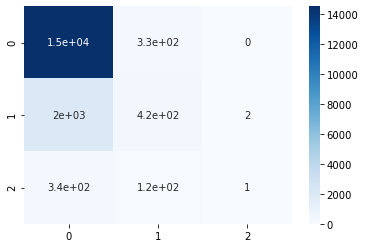

In [206]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print("accuracy score is : ",accuracy_score(yc_test,yc_pred))
print("classification report \n",classification_report(yc_test,yc_pred))

cnf = confusion_matrix(yc_test,yc_pred)
sns.heatmap(cnf, annot=True, cmap = "Blues")

Observations:

    1.Due to abnormal distribution of data point -model is highly accurate in predicting no crop damage but needs 
    improvement in predicting pesticide crop damage.
       
    2.Attempting to use ADABoost Classifier to boostup accuracy of the model.

In [207]:
#Using adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=10,learning_rate=1)
ad.fit(xc_train,yc_train)
ad_pred=ad.predict(xc_test)
print(accuracy_score(yc_test,ad_pred))
print(confusion_matrix(yc_test,ad_pred))
print(classification_report(yc_test,ad_pred))

0.8400855277965339
[[14830    18     0]
 [ 2361   100     0]
 [  429    34     0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     14848
           1       0.66      0.04      0.08      2461
           2       0.00      0.00      0.00       463

    accuracy                           0.84     17772
   macro avg       0.50      0.35      0.33     17772
weighted avg       0.79      0.84      0.77     17772



#### Not much  improvement is observed by using ADABoost model.
#### But overall it gives good accuracy among all models so we save as our final model. 

## Saving Final Model

In [216]:
#From above we see AdaBoostClassifier is performing better so we will use it to make our final predictions.
Outcome_pred=ad.predict(df_test)

In [217]:
#Dataframe for Crop outcome prediction
Outcome_pred=pd.DataFrame(Outcome_pred,columns=["Crop_Damage"])

In [218]:
Outcome_pred.to_csv('Crop_Damage_Predictions.csv',index=False)